In [8]:
import cv2
import matplotlib.pyplot as plt

sample_img = cv2.imread('./data/ex_image.png')
sample_watermark = cv2.imread('./data/ex_image_logo.png')

img = cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB)
watermark = cv2.cvtColor(sample_watermark, cv2.COLOR_BGR2RGB)

# img와 watermark를 원하는 크기로 resize

img_1080720 = cv2.resize(img, (1080,720))
watermark_300300 = cv2.resize(watermark, (300,300))

# img의 roi 영역 설정

height, width, _ = watermark_300300.shape

x_offset = 400
y_offset = 170

roi = img_1080720[y_offset : y_offset+height, x_offset : x_offset+width]

# mask, mask_inv 생성

watermark_300300_gray = cv2.cvtColor(watermark_300300, cv2.COLOR_RGB2GRAY)

ret, mask = cv2.threshold(watermark_300300_gray, 120, 255, cv2.THRESH_BINARY)

mask_inv = cv2.bitwise_not(watermark_300300_gray)

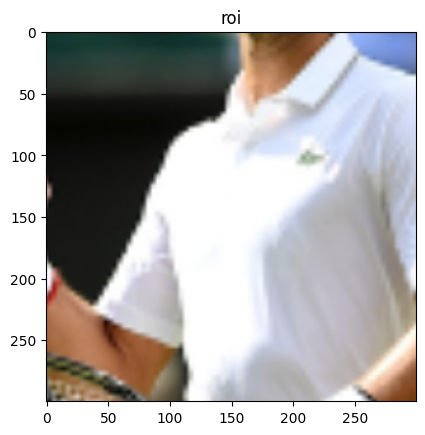

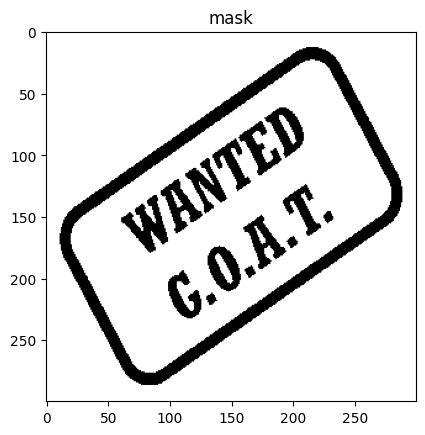

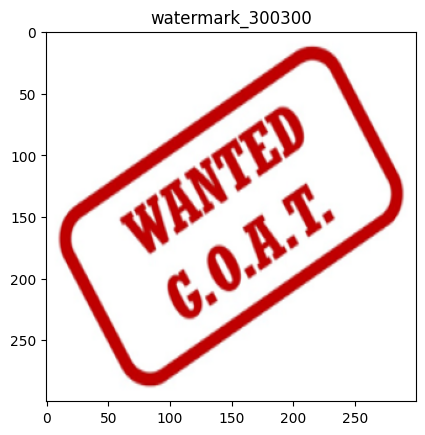

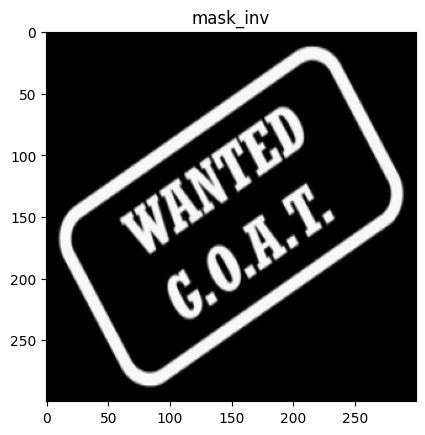

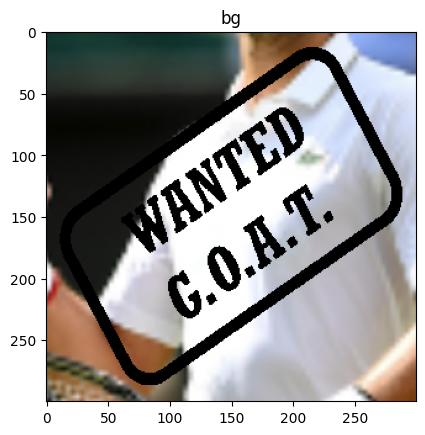

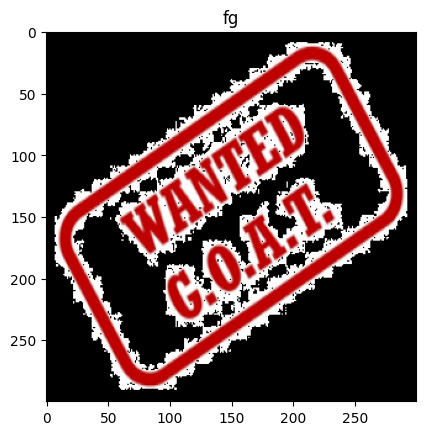

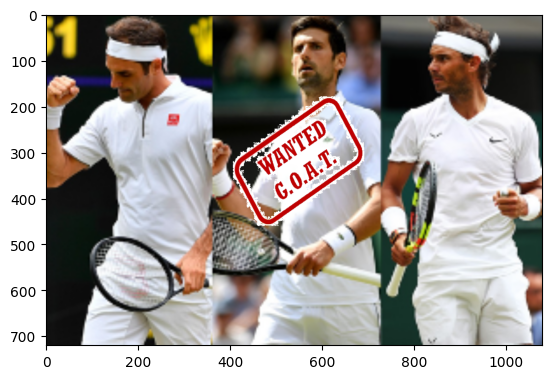

In [9]:
plt.imshow(roi)
plt.title('roi')
plt.show()

plt.imshow(mask, 'gray')
plt.title('mask')
plt.show()

plt.imshow(watermark_300300)
plt.title('watermark_300300')
plt.show()

plt.imshow(mask_inv, 'gray')
plt.title('mask_inv')
plt.show()

# bg, fg 만들고 add하여 최종 roi 생성하고, img의 해당 영역을 대체

bg = cv2.bitwise_or(roi, roi, mask = mask)

fg = cv2.bitwise_and(watermark_300300, watermark_300300, mask=mask_inv)

plt.imshow(bg)
plt.title('bg')
plt.show()

plt.imshow(fg)
plt.title('fg')
plt.show()

final_roi = cv2.add(bg, fg)

img_1080720[y_offset : y_offset+height, x_offset : x_offset+width] = final_roi

#

plt.imshow(img_1080720)
plt.show()